You will implement dropout which is a regularization technique for reducing
ovefitting in neural networks. Specifically, you will perform forward and backward
pass for dropout and test the effects of dropout on a neural network.



In [1]:
from __future__ import print_function
import os
import time
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from cs231n.classifiers.fc_net import *

from cs231n.gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
from cs231n.solver import Solver
from utils import report, run_tasks, makedirs
from cs231n.data_utils import get_CIFAR10_data

run the following from the cs231n directory and try again:
python setup.py build_ext --inplace
You may also need to restart your iPython kernel


In [2]:
def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [3]:
def task1():
    '''
    In the file cs231n/layers.py, implement the forward pass for dropout. Since dropout behaves differently during training and testing,
    make sure to implement the operation for both modes. Once you have done so, run the cell below to test your implementation.
    '''
    print('*'*30+' Task 1 '+'*'*30)
    x = np.random.randn(500, 500) + 10

    for p in [0.3, 0.6, 0.75]:
        out, _ = dropout_forward(x, {'mode': 'train', 'p': p})
        out_test, _ = dropout_forward(x, {'mode': 'test', 'p': p})

        print ('Running tests with p = ', p)
        print ('Mean of input: ', x.mean())
        print ('Mean of train-time output: ', out.mean())
        print ('Mean of test-time output: ', out_test.mean())
        print ('Fraction of train-time output set to zero: ', (out == 0).mean())
        print ('Fraction of test-time output set to zero: ', (out_test == 0).mean())
        print()
    print('*'*30+' Task 1 completed'+'*'*30)

In [4]:
task1()

****************************** Task 1 ******************************
Running tests with p =  0.3
Mean of input:  9.999915698356034
Mean of train-time output:  10.029234359733225
Mean of test-time output:  9.999915698356034
Fraction of train-time output set to zero:  0.298136
Fraction of test-time output set to zero:  0.0

Running tests with p =  0.6
Mean of input:  9.999915698356034
Mean of train-time output:  9.998463419503691
Mean of test-time output:  9.999915698356034
Fraction of train-time output set to zero:  0.6001
Fraction of test-time output set to zero:  0.0

Running tests with p =  0.75
Mean of input:  9.999915698356034
Mean of train-time output:  9.989059255944367
Mean of test-time output:  9.999915698356034
Fraction of train-time output set to zero:  0.75024
Fraction of test-time output set to zero:  0.0

****************************** Task 1 completed******************************


In [5]:
def task2():
    '''
    In the file cs231n/layers.py, implement the backward pass for dropout.
    After doing so, run the following cell to numerically gradient-check your implementation.
    '''
    print('*'*30+' Task 2 '+'*'*30)
    x = np.random.randn(10, 10) + 10
    dout = np.random.randn(*x.shape)

    dropout_param = {'mode': 'train', 'p': 0.8, 'seed': 123}
    out, cache = dropout_forward(x, dropout_param)
    dx = dropout_backward(dout, cache)
    dx_num = eval_numerical_gradient_array(lambda xx: dropout_forward(xx, dropout_param)[0], x, dout)

    print ('dx relative error: ', rel_error(dx, dx_num))
    print('*'*30+' Task 2 completed '+'*'*30)

In [6]:
task2()

****************************** Task 2 ******************************
dx relative error:  1.892903846894865e-11
****************************** Task 2 completed ******************************


In [7]:
def task3(data):
    '''
    As an experiment, we will train a pair of two-layer networks on 500 training examples: one will use no dropout,
    and one will use a dropout probability of 0.75. We will then visualize the training and validation accuracies of the two networks over time.
    Train two identical nets, one with dropout and one without
    Implement the following:
    1. a two layer net using the FullyConnectedNet from fc_net.py and
    Solver class with hiddensize as  300 with dropout value '0.75' .
    2. a two layer net using the FullyConnectedNet from fc_net.py and
    Solver class with hiddensize as  300 without dropout.
    3. plot the train_acc_history and val_acc_history for both of the
    training done above in the same plot'
    use argument dropout for the FullyConnectedNet to provide a dropout
    value
    use following parameters for FullyConnectedNet and Solver:
        1.num_epochs=25
        2.batch_size=100
        3.update_rule='adam
        4.use_batchnorm=True
    '''
    print('*'*30+' Task 3 '+'*'*30)
    num_train = 500
    small_data = {
    'X_train': data['X_train'][:num_train],
    'y_train': data['y_train'][:num_train],
    'X_val': data['X_val'],
    'y_val': data['y_val'],
    }
    #############################################################################################################################
    #                                     TODO                                                                                  #
    #############################################################################################################################
    # 1. a two layer net using the FullyConnectedNet from fc_net.py and Solver class with hiddensize as  300 with dropout value '0.75' .
    # 2. a two layer net using the FullyConnectedNet from fc_net.py and Solver class with hiddensize as  300 without dropout.
    # 3. plot the train_acc_history and val_acc_history for both of the training done above in the same plot
    ################################################################################
    modelwithdropout = FullyConnectedNet([300], dropout=0.75, use_batchnorm=True)
    model = FullyConnectedNet([300], use_batchnorm=True)
    solvedropout = Solver(modelwithdropout, data= small_data, num_epochs=25, batch_size=100,
                    update_rule='adam')

    solvedropout.train()
    print('*'*30+' Model With Dropout training Completed '+'*'*30)
    solve = Solver(model, data= small_data, num_epochs=25, batch_size=100, update_rule='adam')
    solve.train()
    print('*'*30+' Model Without Dropout training Completed '+'*'*30)
    plt.plot(solvedropout.train_acc_history, label = 'Dropout Train accuracy')
    plt.plot(solvedropout.val_acc_history, label = 'Dropout Val accuracy')
    plt.plot(solve.train_acc_history, label = 'Without Dropout Train accuracy')
    plt.plot(solve.val_acc_history, label = 'Without Dropout Val accuracy')
    plt.legend()
    plt.show()
    print('*'*30+' Task 3 completed '+'*'*30)

In [8]:
data = get_CIFAR10_data()

****************************** Task 3 ******************************
(Iteration 1 / 125) loss: 2.366773
(Epoch 0 / 25) train acc: 0.230000; val_acc: 0.172000
(Epoch 1 / 25) train acc: 0.292000; val_acc: 0.221000
(Epoch 2 / 25) train acc: 0.338000; val_acc: 0.267000
(Iteration 11 / 125) loss: 2.058123
(Epoch 3 / 25) train acc: 0.340000; val_acc: 0.270000
(Epoch 4 / 25) train acc: 0.356000; val_acc: 0.269000
(Iteration 21 / 125) loss: 1.908619
(Epoch 5 / 25) train acc: 0.404000; val_acc: 0.295000
(Epoch 6 / 25) train acc: 0.448000; val_acc: 0.305000
(Iteration 31 / 125) loss: 1.864955
(Epoch 7 / 25) train acc: 0.504000; val_acc: 0.328000
(Epoch 8 / 25) train acc: 0.530000; val_acc: 0.331000
(Iteration 41 / 125) loss: 1.709196
(Epoch 9 / 25) train acc: 0.558000; val_acc: 0.327000
(Epoch 10 / 25) train acc: 0.586000; val_acc: 0.332000
(Iteration 51 / 125) loss: 1.635764
(Epoch 11 / 25) train acc: 0.604000; val_acc: 0.352000
(Epoch 12 / 25) train acc: 0.658000; val_acc: 0.344000
(Iteration 

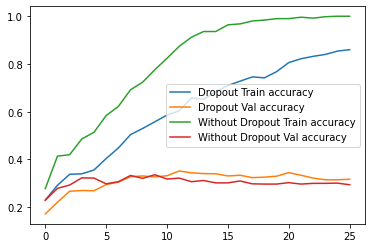

****************************** Task 3 completed ******************************


In [9]:
task3(data)